In [9]:
from photonic_crystal_maker import *
import numpy as np
import matplotlib.pyplot as plt
import meep as mp
from meep import mpb

# Define the lattice
lattice = Lattice("SX", (1,1, Lattice.NO_SIZE))
atom = Geometry(mp.Cylinder, dict(radius = 0.2, height = 0.6, material = Material(epsilon = 12), center = mp.Vector3(0,0,0)))
phc = PhotonicCrystal([atom], lattice)

In [10]:
from mpb_configurator import MPBSchemeConfigurator

# Gamma, X, M, Gamma
k_points = [mp.Vector3(0,0,0), mp.Vector3(0.5,0,0), mp.Vector3(0.5,0.5,0), mp.Vector3(0,0,0)]  
conf = MPBSchemeConfigurator(phc, k_points = k_points, resolution = 32, simulation_types=["te", "tm"], num_bands=6)
conf.print_scheme_config()

(set! num-bands 6)
(set! resolution 32)
(set! k-points (list (vector3 0.0 0.0 0.0) (vector3 0.5 0.0 0.0) (vector3 0.5 0.5 0.0) (vector3 0.0 0.0 0.0)))
(set! k-points (interpolate 4 k-points))
(set! geometry-lattice (make lattice (size 1 1 no-size)  (basis1  (vector3 1.0 0.0 0.0)) (basis2  (vector3 0.0 1.0 0.0)) ))
(set! geometry (list (make cylinder (radius 0.2)
  (height 0.6)
  (material (make dielectric (epsilon 12)))
  (center (vector3 0.0 0.0 0.0)))
))
(run-te)
(run-tm)


Scheme configuration written to test_phc/test_phc.ctl
Simulation completed
Loaded epsilon and lattice vectors
Extracted 17 lines of data for the TM mode
Extracted 17 lines of data for the TE mode
Extracted 0 lines of data for the gaps
Loaded frequency data for mode 'te'
Loaded frequency data for mode 'tm'


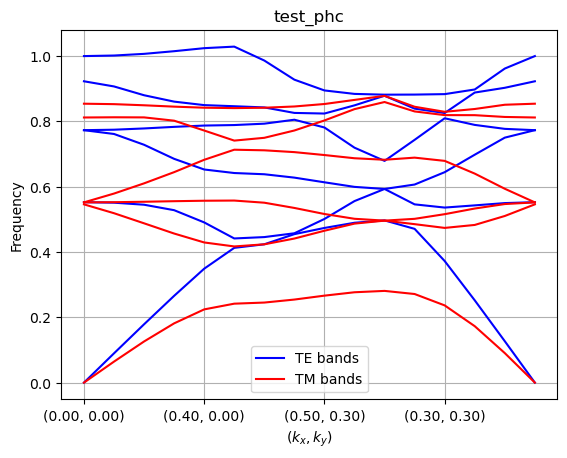

real part range: 1 .. 12


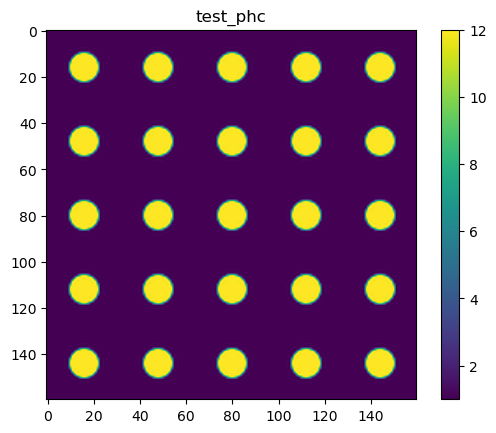

In [11]:
%matplotlib inline
from simulation_handler import Simulation, SimulationViewer
simulation = Simulation("test_phc", conf)
simulation.run()

vwr = SimulationViewer(simulation)

vwr.plot_band_diagram("te", colors="b", decimation_label_factor=4)
vwr.plot_band_diagram("tm", colors="r", decimation_label_factor=4)

vwr.show()

vwr.plot_epsilon(5)
vwr.show()

fig = vwr.plotly_band_diagram("te", decimation_label_factor=4, color="red")
vwr.plotly_band_diagram("tm", decimation_label_factor=4, color="blue", fig=fig) 
